# 初始化所有的点

In [3]:
import random

In [4]:
import matplotlib.pylab as plt

In [5]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitudes = [random.randint(-100, 100) for _ in range(20)]

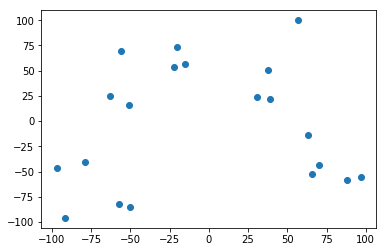

In [6]:
plt.scatter(latitudes, longitudes)

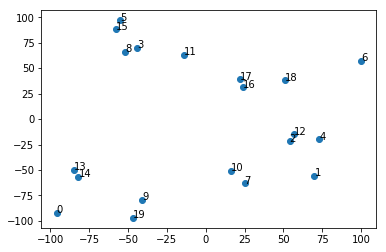

In [7]:
fig, ax = plt.subplots()
ax.scatter(longitudes, latitudes)
for i in range(20):
    ax.annotate(i, (longitudes[i], latitudes[i]))

给定一个初始点 𝑃, 已经 𝑘个车辆，如何从该点出发，经这 k 个车辆经过所以的点全部一次，而且所走过的路程最短?

例如：

# 计算所有点两两之间的距离

In [8]:
import numpy as np
def get_distance(x:tuple,y:tuple)-> float:
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)

coordinates = list(zip(longitudes, latitudes)) 
length=len(coordinates)

dp=[[float('inf')]*2**(length-1) for _ in range(length)]
all_distances={frozenset([i,j]):get_distance(coordinates[i],coordinates[j]) for i in range(length) for j in range(i+1,length)}

In [9]:
all_distances

{frozenset({0, 1}): 169.85876486069242,
 frozenset({0, 2}): 165.5294535724685,
 frozenset({0, 3}): 170.14111789923092,
 frozenset({0, 4}): 183.69812192834198,
 frozenset({0, 5}): 193.3959668659096,
 frozenset({0, 6}): 246.2051989702898,
 frozenset({0, 7}): 124.42668524074729,
 frozenset({0, 8}): 164.01219466856725,
 frozenset({0, 9}): 56.515484603779164,
 frozenset({0, 10}): 119.26860441876563,
 frozenset({0, 11}): 175.35392781457733,
 frozenset({0, 12}): 171.283390905248,
 frozenset({0, 13}): 43.41658669218482,
 frozenset({0, 14}): 37.69615364994153,
 frozenset({0, 15}): 183.96738841436002,
 frozenset({0, 16}): 171.84004189943624,
 frozenset({0, 17}): 176.30938715791623,
 frozenset({0, 18}): 196.23710148695125,
 frozenset({0, 19}): 49.25444142409901,
 frozenset({1, 2}): 37.57658845611187,
 frozenset({1, 3}): 169.91762710207556,
 frozenset({1, 4}): 36.124783736376884,
 frozenset({1, 5}): 197.57024067404484,
 frozenset({1, 6}): 116.91449867317569,
 frozenset({1, 7}): 45.5411901469428,
 

# 正式求解过程，把dp表填完，求解最短路径

In [10]:
def tsp(coordinates):
    tsp.solution={}
    length=len(coordinates)
    dp=[[float('inf')]*(2**(length-1))for _ in range(length)]    
    all_distances = {frozenset([i, j]): get_distance(coordinates[i], coordinates[j]) for i in range(length) for j in range(i+1, length)}
    for i in range(length):
        if i==0:
            continue
        dp[i][0]=all_distances [ frozenset({i, 0})]#递归问题的边界
    for j in range(1,2**(length-1)):#所有城市集合编号，除去0
        for i in range(length):#所有城市
            if i!=0 and  ((j>>(i-1))&1)==1:  #城市本身就在目标集合中(j的第i-1位等于1)，跳过
                continue
            for k in range (1,length):
                if k!=0 and ((j>>(k-1))&1)==0:#j的第k-1位等于0，城市不在城市集合中，跳过
                    continue
                pos=j^(1<<(k-1))  #取得集合对应的编码,i和k都是城市，j和pos都是城市集合编码,j=1的时候（即集合中只有1个城市），i为不包含1的所有值，k为1，pos为0
                tmp_dist=all_distances [ frozenset({i, k})]+ dp[k][pos]
                if  dp[i][j]>tmp_dist:
                    dp[i][j]=tmp_dist
                    tsp.solution[(i,j)]=(k, pos)#如solution[(2,{3})]=(3, 0),solution[(1,{2,3})]=(2,{3})
#     return dp[0][-1]
    return dp[0][2**(length-1)-1]

In [64]:
coordinates

[(-27, -89),
 (-78, 26),
 (-54, 79),
 (-83, 25),
 (-13, -42),
 (-14, -96),
 (-70, -78),
 (69, -25),
 (88, -83),
 (63, 56),
 (-26, -54),
 (3, 45),
 (25, -81),
 (-32, -99),
 (48, -72),
 (61, 59),
 (11, 69),
 (-86, 83),
 (-79, -85),
 (42, -46)]

In [11]:
tsp(coordinates)

725.9529234779466

In [12]:
tsp.solution

{(0, 1): (1, 0),
 (2, 1): (1, 0),
 (3, 1): (1, 0),
 (4, 1): (1, 0),
 (5, 1): (1, 0),
 (6, 1): (1, 0),
 (7, 1): (1, 0),
 (8, 1): (1, 0),
 (9, 1): (1, 0),
 (10, 1): (1, 0),
 (11, 1): (1, 0),
 (12, 1): (1, 0),
 (13, 1): (1, 0),
 (14, 1): (1, 0),
 (15, 1): (1, 0),
 (16, 1): (1, 0),
 (17, 1): (1, 0),
 (18, 1): (1, 0),
 (19, 1): (1, 0),
 (0, 2): (2, 0),
 (1, 2): (2, 0),
 (3, 2): (2, 0),
 (4, 2): (2, 0),
 (5, 2): (2, 0),
 (6, 2): (2, 0),
 (7, 2): (2, 0),
 (8, 2): (2, 0),
 (9, 2): (2, 0),
 (10, 2): (2, 0),
 (11, 2): (2, 0),
 (12, 2): (2, 0),
 (13, 2): (2, 0),
 (14, 2): (2, 0),
 (15, 2): (2, 0),
 (16, 2): (2, 0),
 (17, 2): (2, 0),
 (18, 2): (2, 0),
 (19, 2): (2, 0),
 (0, 3): (1, 2),
 (3, 3): (2, 1),
 (4, 3): (2, 1),
 (5, 3): (2, 1),
 (6, 3): (2, 1),
 (7, 3): (1, 2),
 (8, 3): (2, 1),
 (9, 3): (1, 2),
 (10, 3): (2, 1),
 (11, 3): (2, 1),
 (12, 3): (2, 1),
 (13, 3): (2, 1),
 (14, 3): (2, 1),
 (15, 3): (2, 1),
 (16, 3): (2, 1),
 (17, 3): (2, 1),
 (18, 3): (2, 1),
 (19, 3): (1, 2),
 (0, 4): (3, 0),
 

# parse solution

In [13]:
def parse(length:int,solutions:dict)->str:
    route=['0']
    def helper(row:int,col:int)->None:
        i,j=solutions[(row,col)]#row和i是城市，col和i是城市集合编号
        route.append(str(i))#提取i连接起来，再加上0就是最终路径
        if j==0: return
        helper(i,j)#循环调用函数helper
    helper(0,2**(length-1)-1)
    route.append('0')
    return route

def re_print(route)->str:
    print('->'.join(route))

In [14]:
route=parse(20,tsp.solution)

In [16]:
re_print(route)

0->14->13->8->15->5->3->11->17->16->18->6->4->12->2->1->7->10->9->19->0
